In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [3]:
df.head()

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df_dropped = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_dropped

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [6]:
survivors_count= df_dropped['Survived'].value_counts()

In [7]:
survivors_count

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

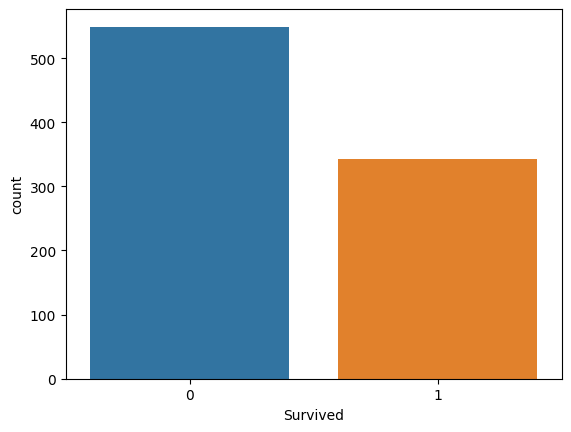

In [8]:
sns.countplot(df_dropped, x='Survived')

In [9]:
genSur = df_dropped[df_dropped['Survived'] == 1].groupby(['Gender']).count()
genSur = genSur.drop(['Pclass', 'Age', 'Fare'], axis=1)
genSur

,Survived
Gender,
female,233
male,109


In [10]:
rateGenSur = df_dropped.groupby('Gender')['Survived'].mean()
rateGenSur

Gender
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [11]:
table = df_dropped.pivot_table('Survived', index= 'Gender', columns = 'Pclass')
table

Pclass,1,2,3
Gender,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<Axes: ylabel='Gender'>

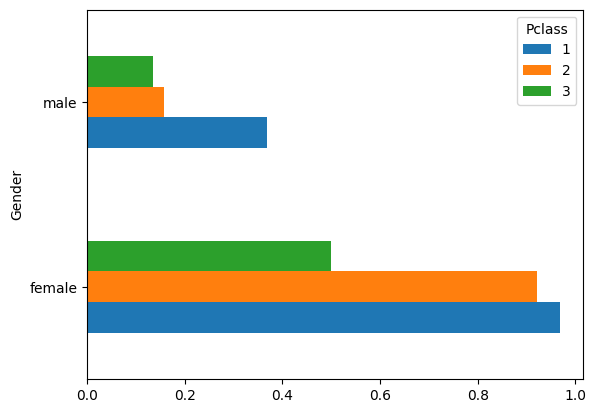

In [12]:
table.plot.barh()

In [13]:
age = pd.cut(df_dropped['Age'], [0,18,80])
ageCut = table = df.pivot_table('Survived', index = ['Gender', age], columns = 'Pclass') 
ageCut

Pclass                  1         2         3
Gender Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

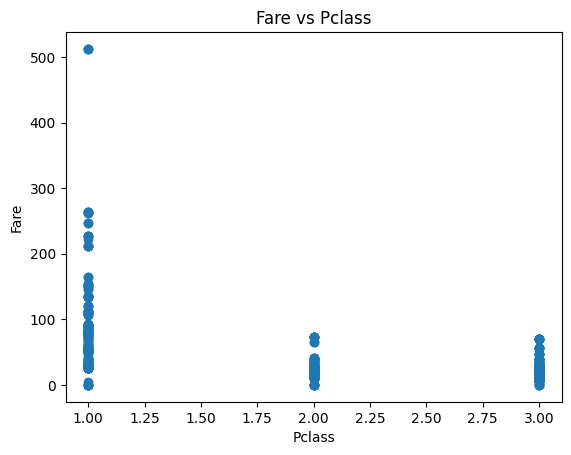

In [14]:
plt.scatter(df_dropped['Pclass'], df_dropped['Fare'])
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Fare vs Pclass')
plt.show()

In [43]:
classes = df_dropped['Survived']
classes

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [45]:
newDf = df_dropped.drop(['Survived'], axis=1)
newDf

,Pclass,Gender,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [46]:
encDf = pd.get_dummies(newDf['Gender']).astype(int)
newEncDf = pd.concat([newDf.drop(['Gender'], axis =1), encDf], axis =1)
newEncDf[:5]

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [47]:
print(newEncDf.describe())

           Pclass         Age        Fare      female        male
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118   32.204208    0.352413    0.647587
std      0.836071   14.526497   49.693429    0.477990    0.477990
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    7.910400    0.000000    0.000000
50%      3.000000   28.000000   14.454200    0.000000    1.000000
75%      3.000000   38.000000   31.000000    1.000000    1.000000
max      3.000000   80.000000  512.329200    1.000000    1.000000


In [48]:
newEncDf['Age'].fillna(newEncDf['Age'].mean() , inplace = True)
print(newEncDf.describe())

           Pclass         Age        Fare      female        male
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118   32.204208    0.352413    0.647587
std      0.836071   13.002015   49.693429    0.477990    0.477990
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   22.000000    7.910400    0.000000    0.000000
50%      3.000000   29.699118   14.454200    0.000000    1.000000
75%      3.000000   35.000000   31.000000    1.000000    1.000000
max      3.000000   80.000000  512.329200    1.000000    1.000000


          Pclass       Age      Fare    female      male
Pclass  1.000000 -0.331339 -0.549500 -0.131900  0.131900
Age    -0.331339  1.000000  0.091566 -0.084153  0.084153
Fare   -0.549500  0.091566  1.000000  0.182333 -0.182333
female -0.131900 -0.084153  0.182333  1.000000 -1.000000
male    0.131900  0.084153 -0.182333 -1.000000  1.000000


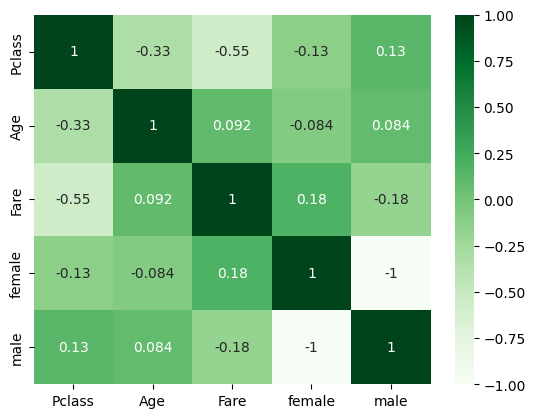

In [49]:
corMat = newEncDf.corr()
print(corMat)
sns.heatmap(corMat, cmap = 'Greens', annot =True)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

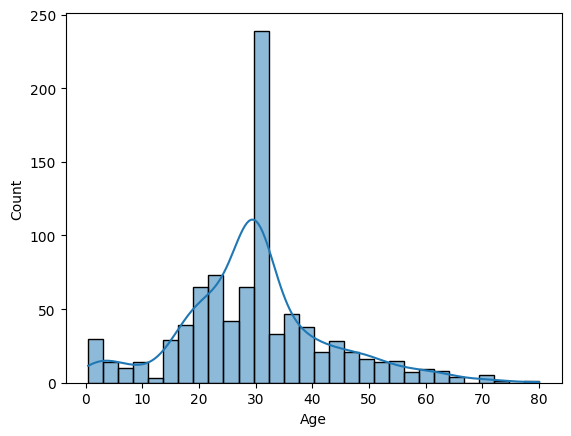

In [50]:
sns.histplot(newEncDf, x = 'Age', kde = True)

<Axes: xlabel='Pclass', ylabel='Count'>

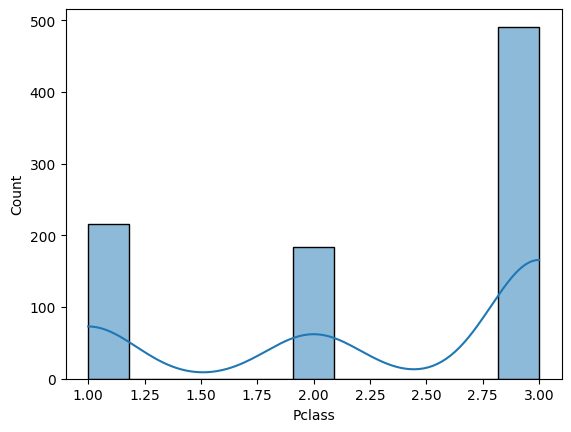

In [51]:
sns.histplot(newEncDf, x = 'Pclass', kde = True)

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(newEncDf, classes, test_size = 0.2, random_state=100)
train_data = pd.concat([X_train, Y_train], axis = 1)
test_data = pd.concat([X_test, Y_test], axis = 1)

In [55]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

GaussianNB()

In [78]:
Y_pred = GNB.predict(X_test)
Y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1], dtype=int64)

In [79]:
Y_test

205    0
44     1
821    1
458    1
795    0
      ..
247    1
259    1
353    0
783    0
852    0
Name: Survived, Length: 179, dtype: int64

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[86, 18],
       [21, 54]], dtype=int64)

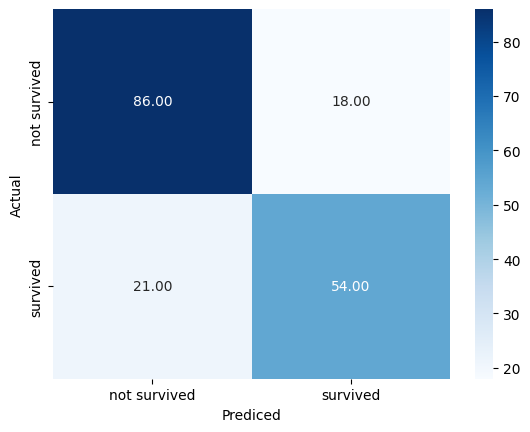

In [82]:
sns.heatmap(cm, cmap="Blues", annot=True, fmt='.2f',
           xticklabels=['not survived', 'survived'], yticklabels=['not survived', 'survived'])
plt.xlabel("Prediced")
plt.ylabel("Actual")
plt.show()

In [83]:
report = classification_report(Y_test, Y_pred)          # Computing the classification report
print(report)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       104
           1       0.75      0.72      0.73        75

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

